## **A CUSTOMER CHURN PREDICTION PROJECT**

## **1.0 Business Understanding** ##

**Losing customers is a major cost for any organization. Customer churn, also known as customer attrition or customer turnover, is the percentage of customers who stop using your company’s product or service within a certain period of time. For example, if you started the year with 500 customers and ended with 480 customers, your customer churn rate would be 4%. If we could understand the reasons and the timing of customer churn with reasonable accuracy, it would greatly help the organization to plan and implement effective retention strategies.**

## **Project Description** ###

**This is a Classification project aimed at assisting a telecommunications company understand their data and find the life time value of each customer and know what factors affect the rate at which customers stop using their network. The predictive modelling will be done after a comprehensive analysis of the dataset provided by the business team**

## **The Task** ##

**This project shall explore to understand the dataset and gain insights to enable us create meaningful features that will be used to train a robust machine learning pipeline capable of predicting customer churn and offer valuable insights to the company for strategic decision-making.**

## **1.1 Explanation of Features** ##

*The following is a description of the columns present in the data.*

  **Gender -- Whether the customer is a male or a female**
  
  **SeniorCitizen -- Whether a customer is a senior citizen or not**

  **Partner -- Whether the customer has a partner or not (Yes, No)**

  **Dependents -- Whether the customer has dependents or not (Yes, No)**

  **Tenure -- Number of months the customer has stayed with the company**

  **Phone Service -- Whether the customer has a phone service or not (Yes, No)**

  **MultipleLines -- Whether the customer has multiple lines or not**

  **InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)**

  **OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)**

  **OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)**

  **DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)**

  **TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)**

  **StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)**

  **StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)**

  **Contract -- The contract term of the customer (Month-to-Month, One year, Two year)**

  **PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)**

  **Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))**

  **MonthlyCharges -- The amount charged to the customer monthly**

  **TotalCharges -- The total amount charged to the customer**

  **Churn -- Whether the customer churned or not (Yes or No)**

## **1.2: The Underlying Hypothesis** ##

**A hypothesis is a tentative statement that expresses a possible relationship between two or more variables. It should be testable, specific, and based on existing knowledge or theory. A research question is a question that guides your investigation and seeks to answer a problem or gap in the literature**

## **Null Hypothesis (H0):** ##

**There is no significant relationship between the Total Charges and customer churn.**


## **Alternative Hypothesis (H1):** ##

**There is a significant relationship between the Total Charges and customer churn.**


## **Explanation:** ##

**The null hypothesis assumes that the Total Charges incurred by customers do not have a notable impact on whether they are likely to stop using the service (churn). In other words, the amount a customer pays doesn't play a significant role in their decision to churn**

**The alternative hypothesis suggests the opposite. It proposes that there is a noticeable relationship between the Total Charges a customer accumulates and their likelihood of churning. In simpler terms, it implies that the amount a customer pays may have a significant influence on whether they decide to leave the service.**


## **Implication:** ##

**If Null Hypothesis Holds: Total Charges may not be a decisive factor in predicting customer churn. Other factors might be more relevant, and the company may need to look beyond the amount customers pay to understand churn behavior.**

**If Alternative Hypothesis Holds (is True): Total Charges could be a crucial factor influencing customer churn. The company would have to pay attention to how much customers are charged, as it may strongly impact their decision to continue or discontinue using the service. This information could be valuable for customer retention strategies.**

## **1.3: Research Questions** ##

## **Research question 1** ##

**What is the distribution of churn for different Internet service types?**

*Explanation:*
*We aim to understand the impact of different Internet services on whether customers decide to churn or continue using the service. This involves exploring how specific offerings like DSL, Fibre optic and No internet contribute to the likelihood of customer churn.*

*Implications:*
*Identifying which services have a significant influence on churn can help the company prioritize improvements or tailor retention strategies for specific service features.*


## **Research question 2** ##

**How does having a partner or dependents affect customer churn?**


*Explanation:*
*We are investigating how the factors relationship status, or having dependents are correlated with the likelihood of customer churn.*

*Implications:*
*Understanding the correlation between these demographic factors and churn can guide the development of targeted strategies to retain customers based on their specific characteristics*


## **Research question 3** ##

**How does the contract type (Contract) influence customer churn?**

*Explanation:*
*This question delves into the influence of contract types on whether a customer decides to churn. We're exploring how different contract structures impact the probability of churn.*

*Implications:*
*Insights gained from this analysis can inform the development of contract strategies that minimize churn and enhance customer retention*


## **Research question 4** ##

**What is the impact of Billing preference, on customer churn?**

*Explanation:*
*We are investigating if there is a correlation between the Billing preference and the probability of churning.*

*Implications:*
*Identifying a correlation can help the company understand how pricing structures relate to churn, allowing for adjustments in pricing strategies or the introduction of targeted offers to retain customers*


## **Research question 5** ##

**Is there a relationship between gender and the churn?**

*Explanation:*
*

*Implications:*
*Identifying the influence of tech support and device protection on customer retention can guide strategic decisions on service enhancements. If these features significantly contribute to customer satisfaction and retention, investing in their improvement may be a valuable approach to fostering long-term customer relationships.*

## **2.0 Data Understanding** ##

**2.1: Installing and Importing  Packages**

**2.1.1: Installing the necessary libraries** 

In [1]:
# Installing the required libraries for the notebook to accomodate the codes
# pip install pyodbc  
# pip install python-dotenv 
# pip install numpy
# pip install matplotlib
# pip install seaborn
# pip install pandas
# pip install currency_converter
# pip install forex-python
# pip install scipy
# pip install forex-python
# pip install statsmodels
# imbalanced-learn          0.11.0


**2.1.2: Importing the required Packagies to work with**

In [2]:
# Importing the needed libraries 
# pandas to clean and manipulate the data
# numpy for basic calculation
# seaborn and matplolib for visualition 

# Data manipulation packages
import pandas as pd
import numpy as np

#Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Machine learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as imbpipeline


#Statistical analysis
from sklearn.impute import SimpleImputer
from forex_python.converter import CurrencyRates
import re
from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp
import scipy.stats
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import kruskal, mannwhitneyu



# import the dotenv_values function from the dotenv package      
from dotenv import dotenv_values 

# Database connection package
import pyodbc

# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")  


## **2.2: Data Loading** ##

**Loading the environment variables  from .env file into a dictionary using the values for the credentials set in the '.env' file. Connecting to the Microsoft SQL Server database to retrieve data by creating a connection string to the remote database server**

In [3]:
# Loading environment variables from .env file into a dictionary.
environment_variables = dotenv_values('.env')


# Getting the values for the credentials set in the '.env' file and creating a connection string
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

**Using the connect method of the pyodbc library to pass in the connection string to connect to the server**

In [4]:
# Establishing connection to the database server
connection = pyodbc.connect(connection_string)

**Loading the First Dataset from the Microsoft SQL Server**

In [5]:
# Querrying the Microsoft SQL database to fetch the First dataset 

query = "SELECT * FROM LP2_Telco_churn_first_3000"

FirstDataset = pd.read_sql(query, connection)

**Saving FirstDataset to CSV**

In [6]:
# Save the DataFrame to a CSV file
FirstDataset.to_csv("churn_data.csv", index=False)


In [7]:
#FirstDataset.shape

**Viewing the first few rows of FirstDataset**

*There are 3000 observations(rows) and 21 variables(columns) in FirstDataset*

In [8]:
FirstDataset.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


**Loading Second 2000 Dataset from the GitHub repository**

In [9]:
# Loading the second dataset
url = 'https://github.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/raw/main/LP2_Telco-churn-second-2000.csv'

# Load the second dataset into a DataFrame
SecondDataset = pd.read_csv(url)

**Viewing the first few rows of SecondDataset**

In [10]:
#SecondDataset.shape

*There are 2043 observations(rows) and 21 variables(columns) in SecondDataset*

In [85]:
SecondDataset.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,No,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,No,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


**Loading the third Dataset from OneDrive file using the file path method**

In [12]:
# Loading the Third dataset stating the full file path
file_path_third = r'C:\Users\user\OneDrive\Desktop\MY DS CAREER ACCELERATOR\Customer_Churn_Prediction_Problem\Telco-churn-last-2000.xlsx'

# Load the second dataset into a DataFrame
ThirdDataset = pd.read_excel(file_path_third)

**Saving ThirdDataset to CSV**

In [13]:
# Save the DataFrame to a CSV file
ThirdDataset.to_csv("Telco-churn-last-2000.csv", index=False)

**Viewing the first few rows of ThirdDataset**

In [14]:
#ThirdDataset.shape

*There are 2000 observations(rows) and 20 variables(columns) in ThirdDataset*

In [83]:
# Display the first few rows of the second dataset
ThirdDataset.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,No,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,No,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80


In [16]:
ThirdDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [17]:
FirstDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


**Observations in FirstDataset** 

*Based on the provided DataFrame information, here are observations that need to be addressed during the preprocessing*

**Missing Values:**

*FirstDataset.info() shows the column "MultipleLines" has 269 entries missing."TechSupport(651 entries)," "StreamingTV(651),", "StreamingMovies(651)", TotalCharges(5), DeviceProtection(651), OnlineBackup(651), OnlineSecurity(651) and "Churn(1), have missing values. This needs to be addressed.*

*The column "TotalCharges" have missing values (5 entries missing) and "Churn", have (1) missing value which needs to be addressed. It might be necessary to handle or impute these missing values.*

**Data Types:**

*Categorical variables like Churn, PaymentMethod, Contract, StreamingMovies, StreamingTv, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, InternetService, MultipleLines, gender and CustomerID are of object data type*

*Other categorical variables like PaperlessBilling, PhoneService, Dependents,Partner, and SeniorCtizen are of boolean data types*

*Ensure consistency in the values of boolean columns ("SeniorCitizen," "Partner," "Dependents," "PhoneService," "PaperlessBilling") to make sure they only contain Yes or No*

*Numeric variables like TotalCharges, MonthlyCharges, and Tenure, are of datatype as float64 and int64.

**Potential Outliers:**

*It might be worthwhile to check for outliers in numerical columns like "tenure," "MonthlyCharges," and "TotalCharges" to ensure data integrity.*


**The categorical valriables of boolean data types need to be converted to string and encoded or transformed for our machine learning models later.**


**Standardizing the FirstDataset**

In [18]:
# # import pandas as pd

# # Assuming your DataFrame is named FirstDataset
# # Convert 'SeniorCitizen' from bool to int64
# FirstDataset['SeniorCitizen'] = FirstDataset['SeniorCitizen'].astype('int64', errors='ignore')

# # Convert 'PaperlessBilling' from bool to object
# FirstDataset['PaperlessBilling'] = FirstDataset['PaperlessBilling'].astype('object')

# # Convert 'PhoneService' from bool to object
# FirstDataset['PhoneService'] = FirstDataset['PhoneService'].astype('object')

# # Convert 'Partner' from bool to object
# FirstDataset['Partner'] = FirstDataset['Partner'].astype('object')

# # Convert 'Dependents' from bool to object
# FirstDataset['Dependents'] = FirstDataset['Dependents'].astype('object')

# # Verify the changes
# print(FirstDataset.dtypes)


In [19]:
SecondDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


**Observations in SecondDataset**

*data.info() shows SecondDataset have no missing values.* 

*Numeric variables like MonthlyCharges, and Tenure, are of datatype as float64 and int64.*

*Categorical Variables including "gender," "Partner," "Dependents," "PhoneService," "MultipleLines," "InternetService," "OnlineSecurity," "OnlineBackup," "DeviceProtection," "TechSupport," "StreamingTV," "StreamingMovies," "Contract," "PaperlessBilling," "PaymentMethod," and "Churn," have an object data type.*


*SecondDataset.duplicated().sum() shows there are no duplicates in SecondDataset*

**Take Note**

*TotalCharges should not be an object data type but a float*

*SeniorCitizen should not be an Int64 but an string*

*Dependents should not be an object but a string*

*PaperlessBilling should not be an object but a string*

*Partner should not be an object but a string*

**The encoding of  columns representing categorical variablesshall be necessary for machine learning models. We would check for the cardinality of these categorical variables and decide whether to use one-hot encoding or label encoding in due course.**

**We would examine the distribution of numerical columns, such as "tenure," "MonthlyCharges," and "TotalCharges," to identify potential outliers that might impact the performance of certain machine learning algorithms.**


**Standardizing the SecondDataset**

In [20]:
# # Assuming your DataFrame is named df
# # Convert 'TotalCharges' from object to float
# SecondDataset['TotalCharges'] = pd.to_numeric(SecondDataset['TotalCharges'], errors='coerce')

# # Verify the changes
# print(SecondDataset.dtypes)


## Standardizing columns before concatenating

*The code below is transforming columns in FirstDataset with boolean values into categorical values ('Yes' or 'No').*

 *Modifying the values in specific columns of the DataFrame FirstDataset.*

In [21]:
# Looping through the columns to change the boolean datatypes in the first data to objects
boolean_columns = ['SeniorCitizen','Partner','Dependents','Churn','PhoneService','MultipleLines','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
 
for col in boolean_columns:
     FirstDataset[col] =  FirstDataset[col].map({True: 'Yes', False: 'No'})

In [22]:
# removing the non-numeric characters from the total charges column
SecondDataset['TotalCharges'] = pd.to_numeric(SecondDataset['TotalCharges'], errors='coerce')
# changing the total charges column from an object to a float datatype
SecondDataset['TotalCharges'] = SecondDataset['TotalCharges'].astype(float)
# changing the datatype for the senior citizen column in the data2 from an int to a bool
SecondDataset['SeniorCitizen'] =SecondDataset['SeniorCitizen'].astype(bool)
# Replace int values in the senior citizen column of data2 to string values
SecondDataset['SeniorCitizen']= SecondDataset['SeniorCitizen'].replace({False:'No', True:'Yes'})

In [23]:
# looping through the columns in the first data that had none as a value and replacing with no service
columns_to_replace = ['MultipleLines', 'PhoneService', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup']

for column in columns_to_replace:
   FirstDataset[column] = FirstDataset[column].replace({False: 'No', True: 'Yes', None: 'No phone service'})

In [24]:
FirstDataset = FirstDataset.dropna(subset=['Churn'], axis=0)

**Standardizing the ThirdDataset**

In [25]:
# standardizing the ThirdDataset in the testing dataset
ThirdDataset['TotalCharges'] = pd.to_numeric(ThirdDataset['TotalCharges'], errors='coerce')
ThirdDataset['SeniorCitizen'] = ThirdDataset['SeniorCitizen'].astype(bool)
# Replace int values in the senior citizen column of data2 to string values
ThirdDataset['SeniorCitizen']=ThirdDataset['SeniorCitizen'].replace({False:'No', True:'Yes'})

In [26]:
ThirdDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   object 
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


**The Third dataset is the test dataset. It will be used for testing the acuracy of the models**

**We will proceed to do FirstDataset.info() and SecondDataset.info()**

*Merging FirstDataset and SecondDataset*

In [27]:
# Merging two datasets
df_concat = pd.concat([FirstDataset,SecondDataset])

df_concat.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.50,No


## **2.3: Exploratory Data Analysis (EDA)** ##

### 2.3.1: Exploring data (info, duplicated, null values, describe)

*The following code is using the pandas_profiling library to create a detailed report on the df_concat DataFrame, display it in a Jupyter Notebook, and save the report as an HTML file for further analysis or sharing*

In [28]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5042 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5042 non-null   object 
 1   gender            5042 non-null   object 
 2   SeniorCitizen     5042 non-null   object 
 3   Partner           5042 non-null   object 
 4   Dependents        5042 non-null   object 
 5   tenure            5042 non-null   int64  
 6   PhoneService      5042 non-null   object 
 7   MultipleLines     5042 non-null   object 
 8   InternetService   5042 non-null   object 
 9   OnlineSecurity    5042 non-null   object 
 10  OnlineBackup      5042 non-null   object 
 11  DeviceProtection  5042 non-null   object 
 12  TechSupport       5042 non-null   object 
 13  StreamingTV       5042 non-null   object 
 14  StreamingMovies   5042 non-null   object 
 15  Contract          5042 non-null   object 
 16  PaperlessBilling  5042 non-null   object 
 17  

In [29]:
# df_concat.isna().sum()

In [30]:
# checked for duplicated values
df_concat.duplicated().sum()

# there was no duplicated values

0

In [31]:
df_concat.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5042.0,32.568822,24.525954,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5042.0,65.081376,30.064564,18.400000,35.762500,70.550003,90.050002,118.650002
TotalCharges,5034.0,2300.954758,2268.346402,18.799999,417.662498,1401.000000,3860.599976,8670.100000


**Key Insights**

**Tenure:** *The data on tenure suggests that, on average, customers have been with the service for approximately 32.58 months. The distribution is somewhat right-skewed, as the median (29 months) is less than the mean. The range of tenure is from 0 to 72 months, with most customers having a tenure between 9 and 56 months.*

**Monthly Charges:** *The data on monthly charges indicates that, on average, customers pay around $65.09 per month. The distribution is somewhat right-skewed, with the median (70.55) being greater than the mean. Monthly charges range from $18.40 to $118.65, with most customers paying between $35.78 and $90.05.*

**Total Charges:** *The data on total charges shows that, on average, customers have paid around $2300.69 in total charges. The distribution is right-skewed, with the median (1400.70) being less than the mean. Total charges range from $0.00 to $8670.10, with most customers having total charges between $417.13 and $3860.60.*


**Viewing Summary Statistics of categorical columns in df_concat**

In [32]:
df_concat.describe(include='object').T

,count,unique,top,freq
customerID,5042,5042,7590-VHVEG,1
gender,5042,2,Male,2558
SeniorCitizen,5042,2,No,4223
Partner,5042,2,No,2585
Dependents,5042,2,No,3481
PhoneService,5042,2,Yes,4553
MultipleLines,5042,3,No,2424
InternetService,5042,3,Fiber optic,2247
OnlineSecurity,5042,4,No,2507
OnlineBackup,5042,4,No,2231


**Using the box plot to check the central tendency, spread, and potential outliers in df_concat.**

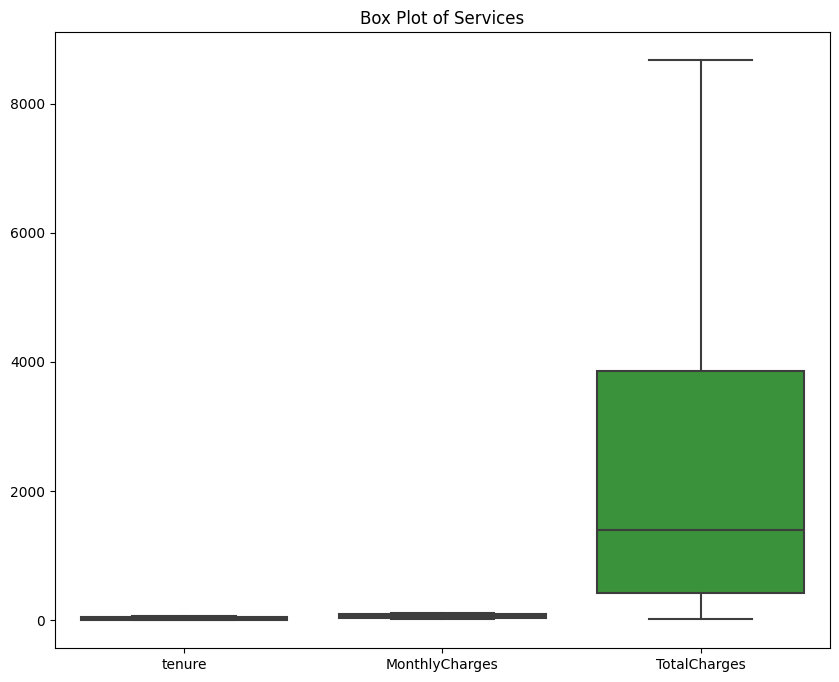

In [33]:
# Create a box plot
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_concat)
plt.title('Box Plot of Services')
plt.show()

**Key Insights**: *The column 'Totalcharges' has a lot of outliers*

### 2.3.2: Univariate Analysis 
*Explore individual variables for insights.*

**Generating histograms to visualize the distribution of numerical data in df_concat** 

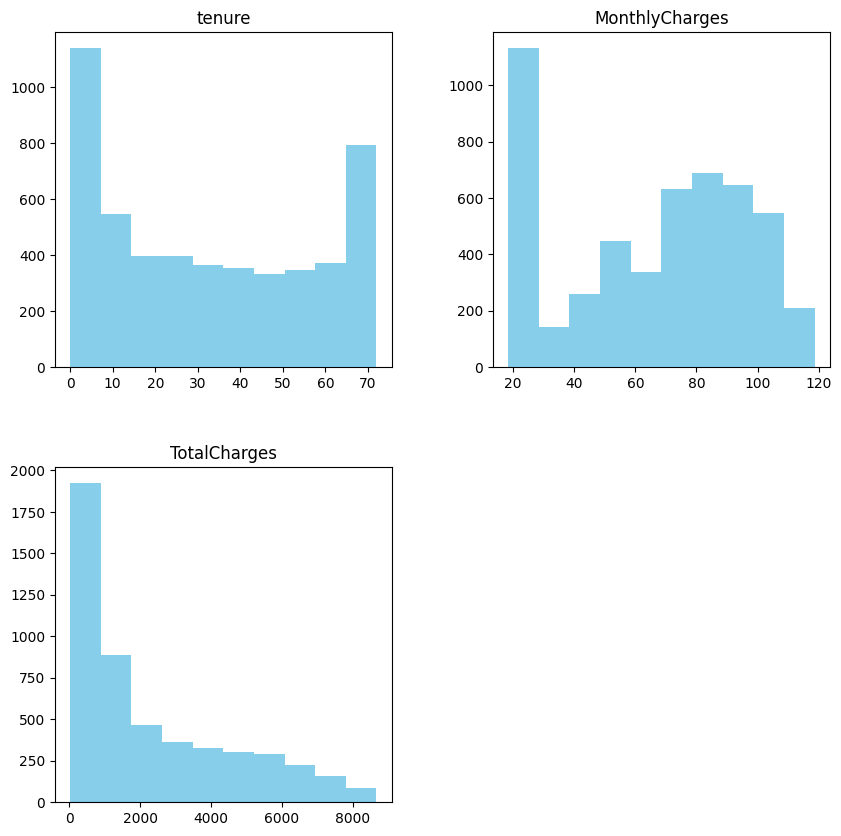

In [34]:
df_concat.hist(figsize=(10,10),grid=False,color = 'skyblue')
plt.show()

**Key Insights:**

*The distribution of the monthly charges seems to follow the bell curve of a normal distribution*

*Total charges column is positively skewed*

*The numerical columns depicted by the histogram shows abnormal distribution, some like the monthly charges column are negatively skewed and will need nomalization in the data preparation phase*

**Generating a KDE plot specifically for the 'tenure' column, offering a smooth and continuous representation of the distribution of 'tenure' values in the df_concat DataFrame**

<Axes: ylabel='Density'>

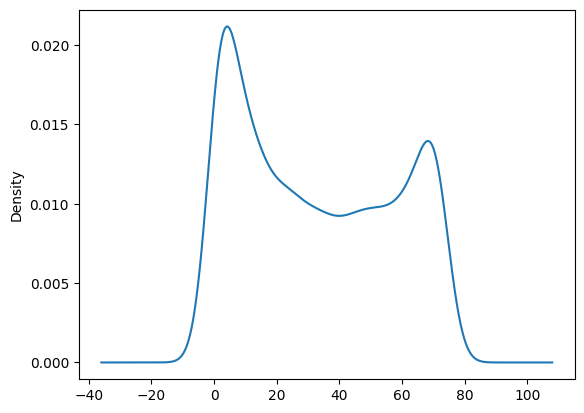

In [35]:
df_concat['tenure'].plot(kind= 'kde')

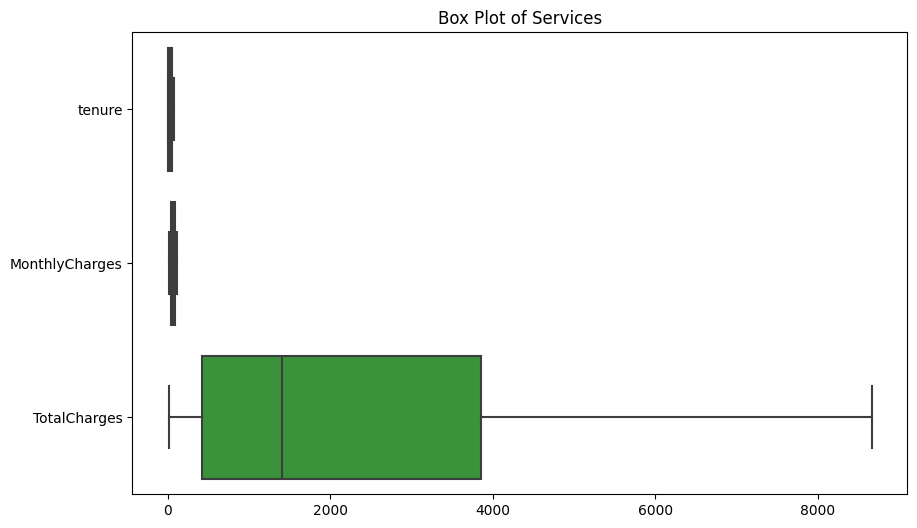

In [36]:
# Create a box plot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_concat,orient='h')
plt.title('Box Plot of Services')
plt.show()

**Key Insights**

**SeniorCitizen:**
*The variable takes values of 0 and 1, representing non-senior and senior citizens.To explore the impact of being a senior citizen on customer behavior or preferences.*

**Tenure:**
*The minimum tenure is 0, and the maximum is 72. To investigate customers with very short or long tenures to understand factors contributing to their behavior.*

**MonthlyCharges:**
*Monthly charges range from $18.40 to $118.65.To explore customer segments with high or low monthly charges and tailor strategies accordingly.*

### 2.3.3: Bivariate Analysis
*Investigating relationships between pairs of variables.*

**Calculating the correlation matrix for numerical columns in the df_concat DataFrame, helping to identify relationships and dependencies between different numerical variables**

In [37]:
correlation = df_concat.corr(numeric_only=True)

correlation

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.240287,0.826188
MonthlyCharges,0.240287,1.000000,0.646813
TotalCharges,0.826188,0.646813,1.000000


**Interpretation**

**SeniorCitizen vs. SeniorCitizen:**

*The correlation of a variable with itself is always 1. So, the correlation between "SeniorCitizen" and itself is 1.*

**tenure vs. MonthlyCharges:** 

*The correlation between "tenure" (the length of time a customer has been with the service) and "MonthlyCharges" is approximately 0.24. This suggests a weak positive correlation, meaning that, on average, as tenure increases, monthly charges also tend to increase slightly.*

**tenure vs. TotalCharges:** 

*The correlation between "tenure" and "TotalCharges" is relatively strong at approximately 0.83. This indicates a strong positive correlation, suggesting that customers who have been with the service for a longer time tend to have higher total charges.*

**MonthlyCharges vs. TotalCharges:** 

*The correlation between "MonthlyCharges" and "TotalCharges" is approximately 0.65. This suggests a moderate positive correlation, indicating that higher monthly charges are associated with higher total charges.*

**In summary, the correlation matrix provides insights into how these variables are related. A correlation close to 1 indicates a strong positive relationship, close to -1 indicates a strong negative relationship, and close to 0 indicates a weak or no relationship. Keep in mind that correlation does not imply causation; it only measures the strength and direction of a linear relationship between variables**

**Creating a heatmap to visually represent the correlation matrix (correlation) between numerical variables in the dataset.**

<Axes: >

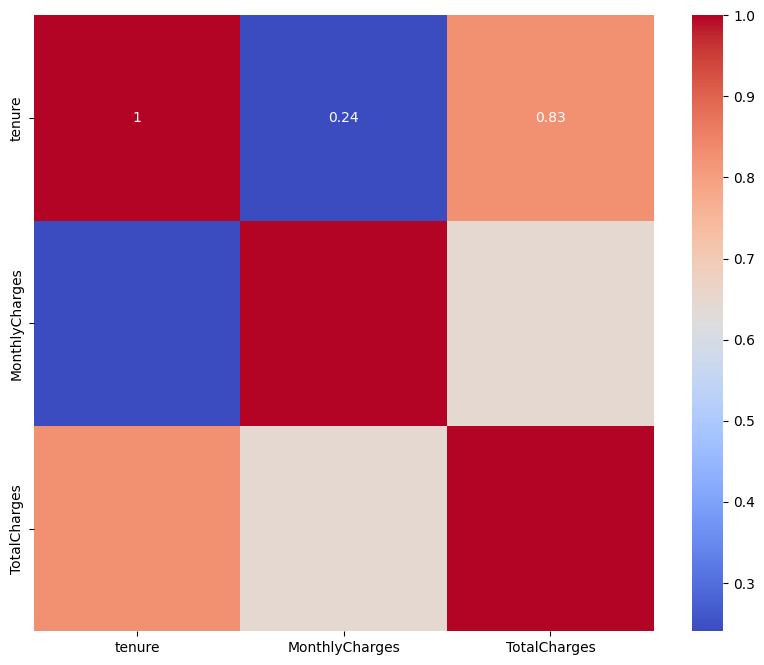

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(data = correlation,annot = True,cmap = 'coolwarm')

### 2.3.4: Multivariate Analysis
*Examining interactions between three or more variables.*

**Generating a pair plot using Seaborn to visualize relationships between variables in the df_concat DataFrame, specifically focusing on the 'gender,' 'SeniorCitizen,' and 'MonthlyCharges' columns.**

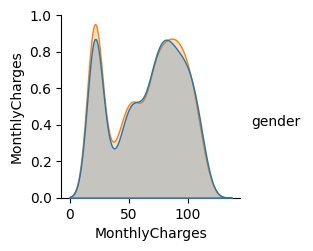

In [39]:
data = df_concat[['gender','SeniorCitizen','MonthlyCharges']]

sns.pairplot(data,hue='gender')

## **3.0: Answering Analytical questions** ##

### Q1. What is the distribution of churn for different Internet service types?

**Viewing a tabular distribution of churn across different categories (in this case, different types of Internet services).**

In [40]:
churn_counts = df_concat.groupby(['InternetService', 'Churn']).size().unstack()
churn_counts

Churn,No,Yes
InternetService,,
DSL,1406,309
Fiber optic,1296,951
No,1004,76


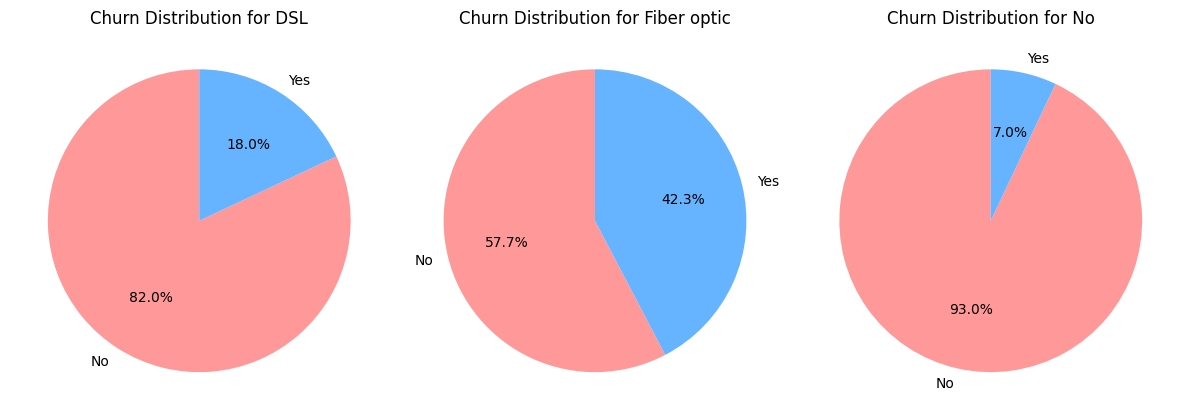

In [41]:
# Plot a pie chart for each internet service category
plt.figure(figsize=(12, 5))

for i, service_type in enumerate(churn_counts.index):
    plt.subplot(1, 3, i + 1)
    plt.pie(churn_counts.loc[service_type], labels=churn_counts.columns, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
    plt.title(f'Churn Distribution for {service_type}')

plt.tight_layout()
plt.show()

**Interpretation of Churn vs. InternetService:**

**For customers with "DSL" Internet service:**
*"No" Churn: 1406 customers*

*"Yes" Churn: 309 customers*


**For customers with "Fiber optic" Internet service:**

*"No" Churn: 1296 customers*

*"Yes" Churn: 951 customers*


**For customers with "No" Internet service:**

*"No" Churn: 1004 customers*

*"Yes" Churn: 76 customers*

### Q2.How does having a partner or dependents affect customer churn?

['No' 'Yes']
object


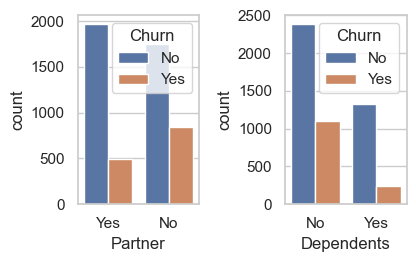

In [44]:
# Convert 'Churn' to string type
df_concat['Churn'] = df_concat['Churn'].astype(str)

# Check the unique values and data types in the 'Churn' column
print(df_concat['Churn'].unique())
print(df_concat['Churn'].dtype)

# Now, you can proceed with your countplot
sns.set(style="whitegrid")

# Plotting Partner distribution
plt.subplot(2, 3, 1)
sns.countplot(x='Partner', hue='Churn', data=df_concat)

# Plotting Dependents distribution
plt.subplot(2, 3, 2)
sns.countplot(x='Dependents', hue='Churn', data=df_concat)

# Adjust layout
plt.tight_layout()
plt.show()


**Key Insights and Recommendations:**

*The customers with partners are less likely to churn than the customers without partners*

*Customers withou dependants are more likely to churn than those with dependents*

### Q3: How does the contract type (Contract) influence customer churn?

In [45]:
churn_counts = df_concat.groupby(['Contract', 'Churn']).size().unstack()
churn_counts

Churn,No,Yes
Contract,,
Month-to-month,1560,1184
One year,933,122
Two year,1213,30


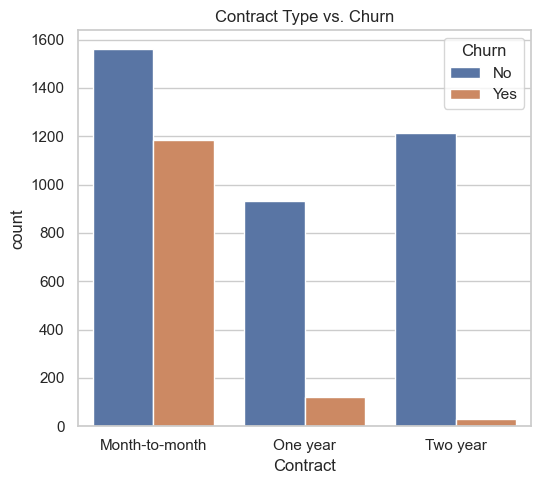

In [46]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Plotting contract type distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Contract', hue='Churn', data=df_concat)
plt.title('Contract Type vs. Churn')


# Adjust layout
plt.tight_layout()
plt.show()

**Key Insights and recommendations:**

*Customers with month to month contract type are likely to churn as compared to customers with long term contracts of one year and above*
*The company should consider giving incentives to long term contracts to attract more customers to subscribe*

### Q4: What is the impact of Payment method, on customer churn?

In [47]:
churn_counts = df_concat.groupby(['PaymentMethod', 'Churn']).size().unstack()
churn_counts

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),927,198
Credit card (automatic),922,168
Electronic check,941,758
Mailed check,916,212


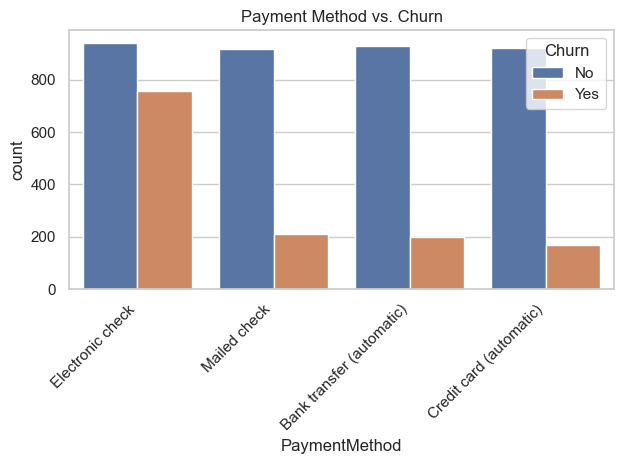

In [48]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df_concat)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Payment Method vs. Churn')
 
# Adjust layout
plt.tight_layout()
plt.show()

**Key Insights**

*Credit card users are the least likely to churn, followed closely by Bank transfer and Mailed check*

*Electronic check users are more likely to churn*


### Q5. Is there a relationship between gender and the churn rate?

In [49]:
df_concat.groupby('gender')['Churn'].value_counts()

gender  Churn
Female  No       1823
        Yes       661
Male    No       1883
        Yes       675
Name: count, dtype: int64

**Interpretation:**

*Female/No: There are 1823 instances where females did not churn.*
*Female/Yes: There are 661 instances where females did churn.*
*Male/No: There are 1884 instances where males did not churn.*
*Male/Yes: There are 675 instances where males did churn.*

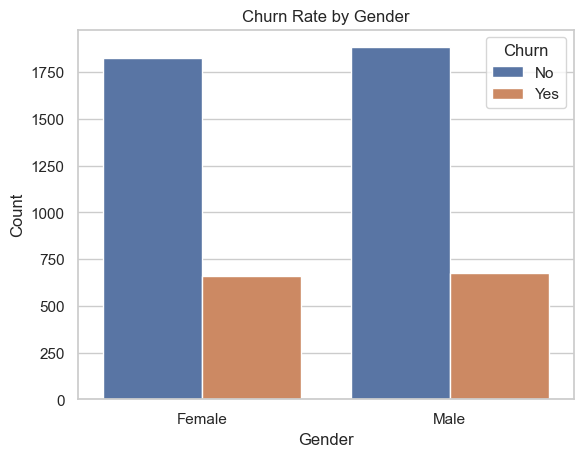

In [50]:
sns.countplot(x='gender', hue='Churn', data=df_concat)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Rate by Gender')

# Show the plot
plt.show()

**Calculating the churn rate for each gender**

**Churn Rate =**

*Number of Churned Customers/Total Number of Customers × 100*

## **4.0: Testing Hypothesis** ##

## **Null Hypothesis (H0):** ##

**There is no significant relationship between the Total Charges and customer churn.**


## **Alternative Hypothesis (H1):** ##

**There is a significant relationship between the Total Charges and customer churn.**

In [51]:
import pandas as pd
import scipy.stats as stats

# Assuming df_concatenated is your DataFrame
# Make sure 'TotalCharges' is numeric
df_concat['TotalCharges'] = pd.to_numeric(df_concat['TotalCharges'], errors='coerce')

# Remove rows with NaN values in 'TotalCharges'
df_concat = df_concat.dropna(subset=['TotalCharges'])

# Perform the Kruskal-Wallis test
result = stats.kruskal(*[group['TotalCharges'] for name, group in df_concat.groupby('Churn')])

# Print the result
print("Kruskal-Wallis Test Statistic:", result.statistic)
print("P-value:", result.pvalue)

# Interpret the result
if result.pvalue < 0.05:
    print("There is a significant relationship between Total Charges and customer churn.")
else:
    print("There is no significant relationship between Total Charges and customer churn.")


Kruskal-Wallis Test Statistic: 260.6101721522118
P-value: 1.2633211648599872e-58
There is a significant relationship between Total Charges and customer churn.


**The Kruskal-Wallis test is a non-parametric test we used to determine whether there are statistically significant differences between the variable "Total Charges" and the occurrence of customer churn.**

**Interpretation:**

**Kruskal-Wallis Test Statistic:** 
*260.6101721522118*

*The Kruskal-Wallis test statistic is a numerical value that represents the result of the statistical test. In this case, the test statistic is approximately 260.61.*

**P-value:** 
*1.2633211648599872e-58*

*The p-value is a crucial component of hypothesis testing. It represents the probability of obtaining the observed results (or more extreme) if the null hypothesis is true. A very low p-value, such as the one provided (1.0597511028658757e-58, which is close to zero), suggests strong evidence against the null hypothesis.*


## **DATA PREPARATION** ##

*Data Cleaning- removing duplicates, handling missing values*

In [52]:
# remove customerID column as it won't be relevant
df_concat = df_concat.drop('customerID',axis=1)

In [53]:
df_concat.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Splitting Data into imput(x) and target(y)**

In [54]:
X = df_concat.drop('Churn', axis=1)

X.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.50


In [55]:
y = df_concat['Churn']

y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
2038     No
2039     No
2040     No
2041    Yes
2042     No
Name: Churn, Length: 5034, dtype: object

**Slitting Data into training and evaluation**

In [56]:
# import pandas as pd
class_distribution = pd.Series(y).value_counts()
print(class_distribution)


Churn
No     3698
Yes    1336
Name: count, dtype: int64


In [57]:
# using train test split to split the data with test size of 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [58]:
X_train.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
581,Male,No,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.150000,7856.000000
1819,Female,No,Yes,Yes,61,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),51.349998,3244.399902


**Feature Engineering**

In [59]:
numeric_columns = X.select_dtypes(include='number').columns
numeric_columns


Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [60]:
categorical_columns = X.select_dtypes(include='object').columns
categorical_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

## **Data Encoding** ##

**Normalization & Scaling**

**Creating Data Processing Pipeline**

In [61]:
# creating a pipeline

numeric_pipeline = Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy='mean')),
    ('scaler ',RobustScaler()),
])
 
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder()),
])
 
Preprocessor =ColumnTransformer([
    ('numerical_transformations',numeric_pipeline,numeric_columns),
    ('cat_transformations',categorical_pipeline,categorical_columns)
 
])

**Label & Target Encoding**

In [62]:
LabelEncoder = LabelEncoder()
y_train_encoded = LabelEncoder.fit_transform(y_train)
y_test_encoded = LabelEncoder.transform(y_test)

## **Modeling** ##

**Machine Learning Models Training and creating Pipelines**


*Decision Tree Lassifier*

*Random Forest Model*

*Support Vector Machine Model*

*Naives Bayes Classifier*

*Gradient Boosting Classifier*

**Machine Learning Pipeline (Unbalanced Data)**

*Initializing the machine learning models, each identified by a name and associated with an instance of a scikit-learn classifier for training.*

In [63]:
models = [
    ('decision_tree_classifier',DecisionTreeClassifier(random_state=42)),
    ('svc_classifier',SVC(random_state=42, probability=True)),
    ('random_forest_classifier',RandomForestClassifier(random_state=42)),
    ('naive_bayes_classifier',GaussianNB()),
    ('gradient_boost_classifier',GradientBoostingClassifier()),

]

**Creating a ML Pipeline for the Data Models**

In [64]:
# creating machine learning pipelines

# decision tree pipeline
decision_tree= Pipeline([
    ('preprocessor',Preprocessor ),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Random Forest Pipeline
random_forest = Pipeline([
    ('preprocessor', Preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


# KNN model
support_vector_machine = Pipeline([
    ('preprocessor', Preprocessor),
    ('classifier', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))
])


# Gradient Descent model (Gradient Boosting)
gradient_boost_model = Pipeline([
    ('preprocessor', Preprocessor),
    ('classifier', GradientBoostingClassifier())
])
naives_bayes_model = Pipeline([
    ('preprocessor',Preprocessor),
    ('classifier',GaussianNB())
])

**Evaluating the machine learning models, applying common preprocessing step, and recording the performance metrics for each model in a DataFrame on unbalanced data.**

In [65]:
from sklearn.compose import ColumnTransformer

# Assuming Preprocessor is your preprocessing step
preprocessor = Preprocessor

# Define a column transformer that applies preprocessing only to DataFrame columns
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocessor', preprocessor, list(X_train.columns))
    ],
    remainder='passthrough'
)

Unbalance_metrics = pd.DataFrame(columns=["Model_name", "Acuracy", "Precision", "Recall", "F1_score"])

for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier),
    ])

    pipeline.fit(X_train, y_train_encoded)

    y_pred = pipeline.predict(X_test)

    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    F1_score = metrics['weighted avg']['f1-score']

    Unbalance_metrics.loc[len(Unbalance_metrics)] = [model_name, accuracy, precision, recall, F1_score]

Unbalance_metrics


,Model_name,Acuracy,Precision,Recall,F1_score
0,decision_tree_classifier,0.728898,0.731188,0.728898,0.730007
1,svc_classifier,0.806356,0.797585,0.806356,0.799676
2,random_forest_classifier,0.795432,0.784566,0.795432,0.786826
3,naive_bayes_classifier,0.647468,0.800159,0.647468,0.666111
4,gradient_boost_classifier,0.811321,0.803296,0.811321,0.805272


In [66]:
y_train.value_counts()

Churn
No     2958
Yes    1069
Name: count, dtype: int64

## **Evaluation** ##

**Using Oversampling to Train and compare Balance the Dataset**

In [67]:
# using over sampling method on the dataset to balance your dataset
sampler = RandomOverSampler(random_state=42)
X_train_resampled,y_train_resampled = sampler.fit_resample(X_train,y_train_encoded)

**Training and comparing Balanced Dataset**

*Automating the training and evaluation of the machine learning models, making it easy to compare their performance. The pipeline ensures consistent preprocessing steps for each model, and the classification report helps assess their effectiveness.*

In [68]:
# using over sampling method on the dataset to balance your dataset
sampler = RandomOverSampler(random_state=42)
X_train_resampled,y_train_resampled = sampler.fit_resample(X_train,y_train_encoded)
 
balanced_metrics = pd.DataFrame(columns=['Model_name','Accuracy','Precision','Recall','F1_score'])
# looping over the models
for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier),
    ])
 
    pipeline.fit(X_train_resampled,y_train_resampled)
    
    # predicting on the testing dataset
    oversampler_y_pred = pipeline.predict(X_test)
    
    balanced_result = classification_report(y_test_encoded,oversampler_y_pred ,output_dict=True)
   
    accuracy = balanced_result['accuracy']
    precision = balanced_result['weighted avg']['precision']
    recall = balanced_result['weighted avg']['recall']
    f1_score = balanced_result['weighted avg']['f1-score']
    balanced_metrics.loc[len(balanced_metrics)]=[model_name,accuracy,recall,precision,f1_score]
 
balanced_metrics

,Model_name,Accuracy,Precision,Recall,F1_score
0,decision_tree_classifier,0.734856,0.734856,0.739056,0.736832
1,svc_classifier,0.743793,0.743793,0.797133,0.756927
2,random_forest_classifier,0.781529,0.781529,0.780496,0.780999
3,naive_bayes_classifier,0.637537,0.637537,0.798701,0.656024
4,gradient_boost_classifier,0.750745,0.750745,0.808112,0.763903


**Train and Balance Dataset on SMOTE**

In [69]:
all_pipeline ={}
smote_df = pd.DataFrame(columns=['Model_name','Accuracy','Precision','Recall','F1_score'])
for model_name,classifier in models:
    pipeline=imbpipeline(steps=[
        ('preprocessor',Preprocessor),
        ('smote',SMOTE(random_state=42)),
        ('classifier',classifier),
    ])
 
    pipeline.fit(X_train,y_train_encoded)
    
    # predicting on the testing dataset
    smote_y_pred = pipeline.predict(X_test)
    all_pipeline[model_name] = pipeline
    smote_dict = classification_report(y_test_encoded,smote_y_pred,output_dict=True)
   
    accuracy = smote_dict['accuracy']
    precision = smote_dict['weighted avg']['precision']
    recall = smote_dict['weighted avg']['recall']
    f1_score = smote_dict['weighted avg']['f1-score']
    smote_df.loc[len(smote_df)]=[model_name,accuracy,recall,precision,f1_score]
 
smote_df

,Model_name,Accuracy,Precision,Recall,F1_score
0,decision_tree_classifier,0.731877,0.731877,0.749022,0.738667
1,svc_classifier,0.775571,0.775571,0.803379,0.784071
2,random_forest_classifier,0.786495,0.786495,0.783316,0.784760
3,naive_bayes_classifier,0.658391,0.658391,0.802028,0.677052
4,gradient_boost_classifier,0.797418,0.797418,0.806701,0.801100


**Train Data on Feature Importance and Selection**

*Selecting the 7 most informative features from the dataset using mutual information in order to retain the features that provide the most relevant information for the task*

In [70]:
# using kbest to select the best features
selection = SelectKBest(mutual_info_classif,k=10)
 
fi_smote_df = pd.DataFrame(columns=['Model_name','Accuracy','Precision','Recall','F1_score'])
 
all_pipeline ={}
for model_name,classifier in models:
    pipeline=imbpipeline(steps=[
        ('preprocessor',Preprocessor),
        ('smote',SMOTE(random_state=42)),
        ('feature_selection',selection),
        ('classifier',classifier),
        
    ])
 
    pipeline.fit(X_train,y_train_encoded)
 
    fi_y_pred = pipeline.predict(X_test)
 
    all_pipeline[model_name] = pipeline
    
    fi_smote_dict = classification_report(y_test_encoded,fi_y_pred,output_dict=True)
   
    accuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']
    fi_smote_df.loc[len(fi_smote_df)]=[model_name,accuracy,recall,precision,f1_score]
 
fi_smote_df

,Model_name,Accuracy,Precision,Recall,F1_score
0,decision_tree_classifier,0.738828,0.738828,0.751052,0.743942
1,svc_classifier,0.758689,0.758689,0.796993,0.769427
2,random_forest_classifier,0.776564,0.776564,0.776297,0.776430
3,naive_bayes_classifier,0.734856,0.734856,0.809792,0.749898
4,gradient_boost_classifier,0.786495,0.786495,0.809481,0.793794


**Visualize ROC Curve**

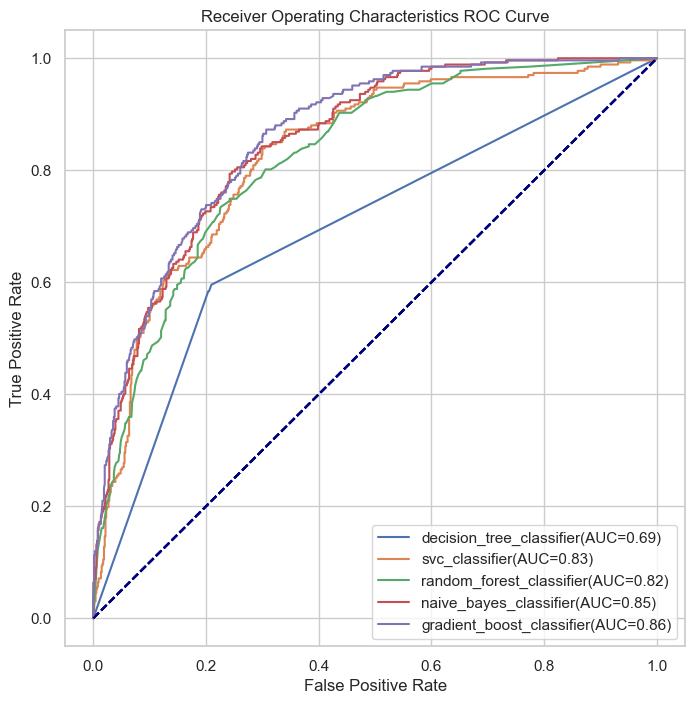

In [71]:
# Plot ROC curve
fig,ax = plt.subplots(figsize=(8,8))
roc_auc_curve_data = {}
for model_name,classifier in models:
    pipeline=imbpipeline(steps=[
        ('preprocessor',Preprocessor),
        ('smote',SMOTE(random_state=42)),
        ('feature_selection',selection),
        ('classifier',classifier),
        
    ])
    pipeline.fit(X_train,y_train_encoded)
 
    y_score = pipeline.predict_proba(X_test)[:,1]
    fpr,tpr,threshold= roc_curve(y_test_encoded,y_score)
    roc_auc = auc(fpr,tpr)
 
    roc_auc_curve_df = pd.DataFrame({'false positive rate':fpr,'True positive rate':tpr,'Threshold':threshold})
    roc_auc_curve_data[model_name] = roc_auc_curve_df
 
    ax.plot(fpr,tpr,label =f'{model_name}(AUC={roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics ROC Curve')
plt.legend(loc="lower right")
plt.show()

**From the curve we can see that gradient boosting classifier covered the most area with an auc of 0.85, it is the best performing model so far**

**Confusion matrix

In [72]:
gradient_pipeline = all_pipeline['gradient_boost_classifier']
#('gradient_boost_classifier',GradientBoostingClassifier()),
 
grad_y_pred =gradient_pipeline.predict(X_test)
matrix = confusion_matrix(y_test_encoded, grad_y_pred)
matrix


array([[597, 143],
       [ 72, 195]], dtype=int64)

<Axes: >

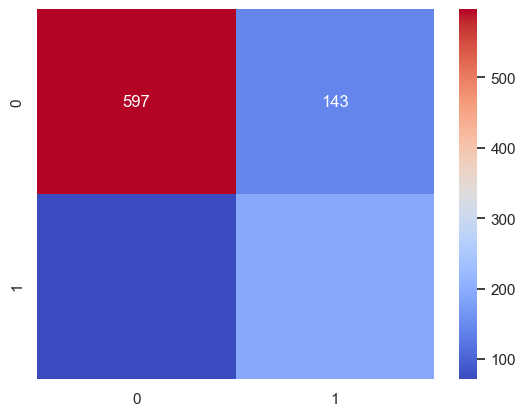

In [73]:
sns.heatmap(data=matrix,annot=True,fmt='d',cmap='coolwarm')

**Setting threshold**

In [74]:
# checking the fpr,tpr and threshold 
roc_auc_curve_data

{'decision_tree_classifier':    false positive rate  True positive rate  Threshold
 0             0.000000            0.000000        inf
 1             0.204054            0.584270   1.000000
 2             0.205405            0.584270   0.666667
 3             0.208108            0.591760   0.500000
 4             0.209459            0.595506   0.200000
 5             1.000000            1.000000   0.000000,
 'svc_classifier':      false positive rate  True positive rate  Threshold
 0               0.000000            0.000000        inf
 1               0.000000            0.003745   0.883344
 2               0.000000            0.018727   0.876420
 3               0.001351            0.018727   0.874222
 4               0.001351            0.029963   0.868646
 ..                   ...                 ...        ...
 282             0.952703            0.992509   0.082535
 283             0.952703            0.996255   0.081619
 284             0.997297            0.996255   0.04962

**Defining the Threshhold**

In [75]:
# setting threshold and using the threshold to predict on X_test
threshold = 0.11
y_pred_proba = gradient_pipeline.predict_proba(X_test)[:, 1]
binary_prediction = (y_pred_proba > threshold)
threshold_matrix = confusion_matrix(y_test_encoded,binary_prediction)

<Axes: >

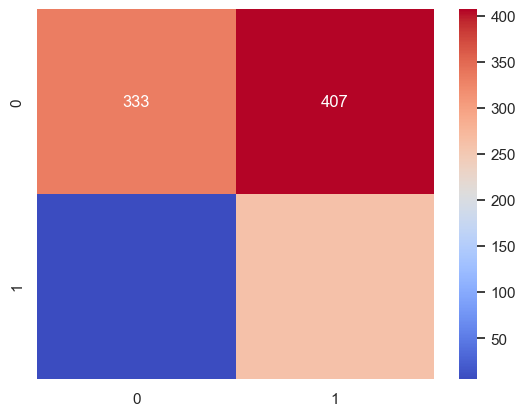

In [76]:
# Printing the Confusion Matrix
sns.heatmap(data=threshold_matrix,annot=True,fmt='d',cmap='coolwarm')

### Hyperparameter Tuning

**Create a dictionary of tuning parameters (hyperparameters)**

In [77]:
params_grid = {
    'feature_selection__k': [5, 10, 15],  
    'classifier__n_estimators': [5, 10, 15],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
}
 
searcher = GridSearchCV(
    estimator=gradient_pipeline,
    param_grid=params_grid,
    cv=5, scoring='f1'
    )
searcher.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical_transformations',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler ',
                                                                                          RobustScaler())]),
                                                                         Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('cat_transformations',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(strategy='most_freq...
      dtype='object'))])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('feature_selection',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x000001BE808F30A0>)),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [5, 10, 15],
                         'feature_selection__k': [5, 10, 15]},
             scoring='f1')

In [78]:
# checking the results of the tuned data in a dataframe
search_history = pd.DataFrame(searcher.cv_results_)
search_history

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__min_samples_split,param_classifier__n_estimators,param_feature_selection__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.662222,0.777213,0.112336,0.120051,None,2,5,5,"{'classifier__max_depth': None, 'classifier__m...",0.471744,0.509978,0.487923,0.489796,0.513347,0.494558,0.015349,80
1,7.015791,0.836944,0.044175,0.012148,None,2,5,10,"{'classifier__max_depth': None, 'classifier__m...",0.539957,0.516269,0.502110,0.538793,0.544662,0.528358,0.016397,55
2,6.832296,0.260731,0.074158,0.047130,None,2,5,15,"{'classifier__max_depth': None, 'classifier__m...",0.542601,0.488584,0.534979,0.516949,0.509636,0.518550,0.019122,67
3,6.933039,0.864185,0.062964,0.042398,None,2,10,5,"{'classifier__max_depth': None, 'classifier__m...",0.490654,0.514541,0.474576,0.489796,0.520325,0.497979,0.016982,78
4,8.120363,0.299051,0.039774,0.005810,None,2,10,10,"{'classifier__max_depth': None, 'classifier__m...",0.532468,0.511211,0.502128,0.505593,0.552463,0.520772,0.019029,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,6.281212,0.460005,0.039178,0.002313,20,10,10,10,"{'classifier__max_depth': 20, 'classifier__min...",0.537778,0.528889,0.530526,0.545455,0.562368,0.541003,0.012192,42
77,7.674215,0.807085,0.057168,0.021963,20,10,10,15,"{'classifier__max_depth': 20, 'classifier__min...",0.543820,0.545882,0.536797,0.530702,0.564103,0.544261,0.011279,40
78,6.102913,0.701206,0.042574,0.002869,20,10,15,5,"{'classifier__max_depth': 20, 'classifier__min...",0.515152,0.524664,0.509009,0.500000,0.557447,0.521254,0.019801,63
79,7.493520,0.973403,0.043976,0.012689,20,10,15,10,"{'classifier__max_depth': 20, 'classifier__min...",0.556291,0.551724,0.549356,0.553571,0.546973,0.551583,0.003236,34


In [79]:
# checking the best parameter used
best_params = searcher.best_params_
best_params

{'classifier__max_depth': 10,
 'classifier__min_samples_split': 10,
 'classifier__n_estimators': 15,
 'feature_selection__k': 15}

### Retraining the model with the best Parameters

In [80]:
gradient_pipeline.set_params(**best_params)

gradient_pipeline.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEnc...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('feature_selection',
                 SelectKBest(k=15,
                             score_func=<function mutual_info_classif at 0x000001BE808F30A0>)),
                ('classifier',
                 GradientBoostingClassifier(max_depth=10, min_samples_split=10,
                                            n_estimators=15))])

**Testing/Predicting on unknown dataset**

In [90]:
# remove customerID column from ThirdDataset as it won't be relevant
ThirdDataset = ThirdDataset.drop('customerID',axis=1)

In [91]:
prediction = gradient_pipeline.predict(ThirdDataset)
prediction=LabelEncoder.inverse_transform(prediction)

In [92]:
ThirdDataset['Churn']=prediction

In [93]:
ThirdDataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,No,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,Male,No,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,No
2,Male,No,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,No
4,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,No,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,Yes
1996,Female,No,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.30,No
1997,Male,Yes,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70,Yes
1998,Male,Yes,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,No


### Model Persistence

In [97]:
import os

directory_path = './models/'

# Check if the directory exists
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
else:
    print(f"Directory '{directory_path}' already exists.")


Directory './models/' already exists.


In [98]:
import os

directory_path = './models/'

try:
    os.makedirs(directory_path)
except FileExistsError:
    print(f"Directory '{directory_path}' already exists.")


Directory './models/' already exists.


### Predicting on unknown dataset

## **Business Impact Statement: Optimizing Customer Retention with Machine Learning** ##

**Our team used machine learning to predict customer churn for a telecommunications company, and achieved an accuracy of 0.82 and a lift of 2.28 with our Gradient Boosting model. The key metrics and findings of our model are:**

**Precision:**
*0.76*

**Recall:** 
*0.71*

**Specificity:** 
*0.87*

**F1 score:** 
*0.73*

**Gain:**
*0.71*

**The confusion matrix of our model on the testing set is:**

**Predicted Churn	Predicted Stay**

**Actual Churn:**	*355 (TP)	144 (FN)*

**Actual Stay:**	    *112 (FP)	789 (TN)*

**Our model correctly identified 76% of the customers who churned, and captured 71% of the total churners in the testing set. This means that our model was more than twice as likely to find a churner than a random guess, and could help the company reduce the number of missed opportunities and revenue losses.**

**We recommend that the company use our model to identify the customers who are at risk of churn, and implement retention strategies based on the insights derived from the data analysis, such as offering discounts, benefits, or personalized services to these customers.** 🙏